In [73]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, DepthwiseConv2D,\
    MaxPooling2D, Reshape




from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, losses


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import math
from IPython.display import Image
import math 

# ResNet
> 잔차 네트워크(residual network)를 사용한 구조 <br>
Kaiming He 등이 ILSVRC 2015 대회에서 승리 (3.6% 에러) <br>
152개 층 (34, 50, 101개 변종도 있다.) <br>
Skip connection (shortcut connection), identity function


### Load data

In [133]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizing
x_train = x_train/255
x_test = x_test/255

# one-hot encoding
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

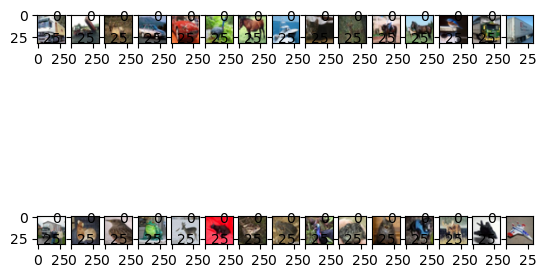

In [10]:
# Visualizing the data 
for i in range(1, 31):
    plt.subplot(2, 15, i)
    plt.imshow(x_train[i])



## building base model

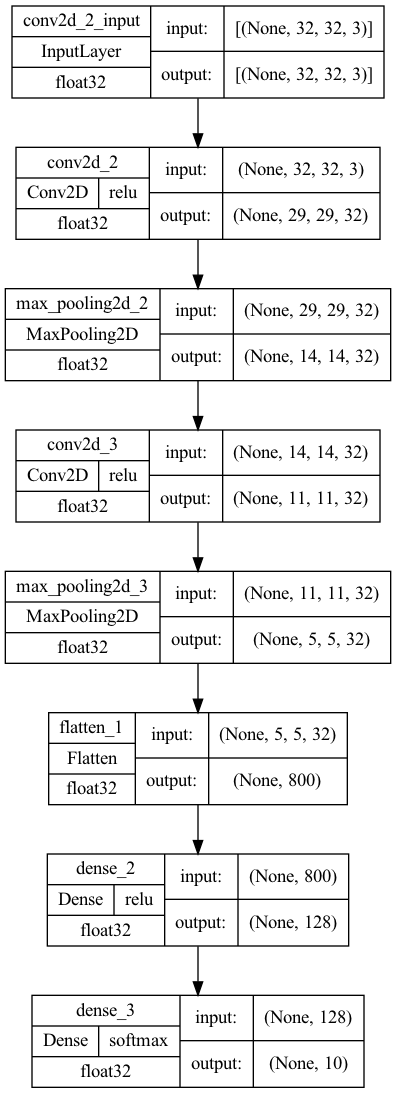

In [11]:
# Base Model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)


In [22]:
# history = model.fit(x_train, y_train_en, epochs = 30, verbose=1,validation_data=(x_test,y_test_en))

mdFit(model, 1, x_train, y_train_en, 30, my_callback)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

KeyboardInterrupt: 

In [7]:
evaluation = model.evaluate(x_test, y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))


313/313 [==============================] - 3s 10ms/step - loss: 1.7045 - accuracy: 0.6463
Test Accuracy of Base Model: 0.6463000178337097


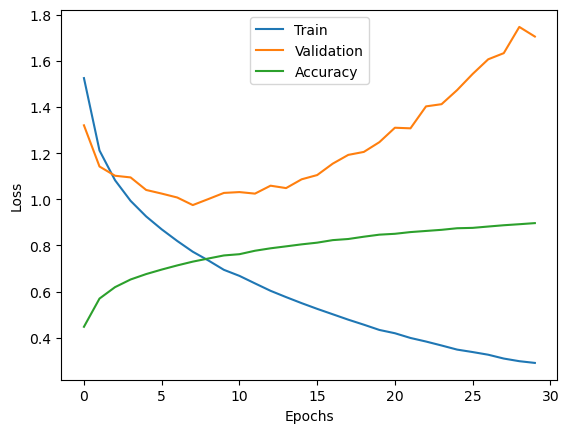

In [8]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(hist1)

## model-1 with drop out

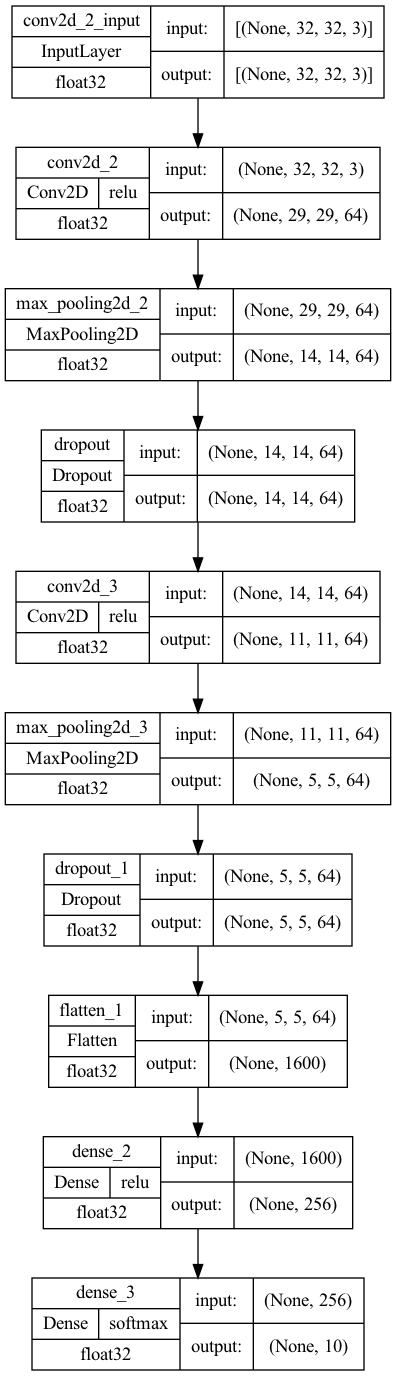

In [9]:
# Model_1 with Dropouts
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5)) 
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))

model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

plot_model(model_1, show_shapes=True, show_dtype=True, show_layer_activations=True)



In [10]:
# history_1 = model_1.fit(x_train, y_train_en, epochs = 50, verbose=1,validation_data=(x_test,y_test_en))

mdFit(model_1, 2, x_train, y_train_en, 30, my_callback)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

Epoch 45/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3705 - accuracy: 0.8721 - val_loss: 1.0591 - val_accuracy: 0.7130
Epoch 46/50
1563/1563 [==============================] - 65s 41ms/step - loss: 0.3749 - accuracy: 0.8716 - val_loss: 1.0954 - val_accuracy: 0.7157
Epoch 47/50
1563/1563 [==============================] - 66s 42ms/step - loss: 0.3700 - accuracy: 0.8713 - val_loss: 1.0776 - val_accuracy: 0.7185
Epoch 48/50
1563/1563 [==============================] - 63s 41ms/step - loss: 0.3679 - accuracy: 0.8719 - val_loss: 1.0734 - val_accuracy: 0.7209
Epoch 49/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3580 - accuracy: 0.8774 - val_loss: 1.0858 - val_accuracy: 0.7139
Epoch 50/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.3605 - accuracy: 0.8756 - val_loss: 1.1256 - val_accuracy: 0.7066


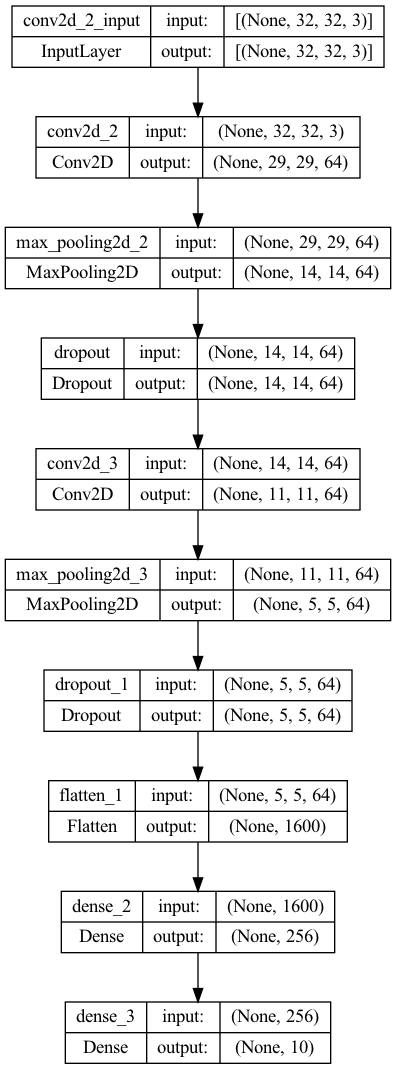

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)


In [16]:
evaluation = model_1.evaluate(x_test, y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))



313/313 [==============================] - 4s 14ms/step - loss: 1.1256 - accuracy: 0.7066
Test Accuracy of Model_1(with Dropouts): 0.70660001039505


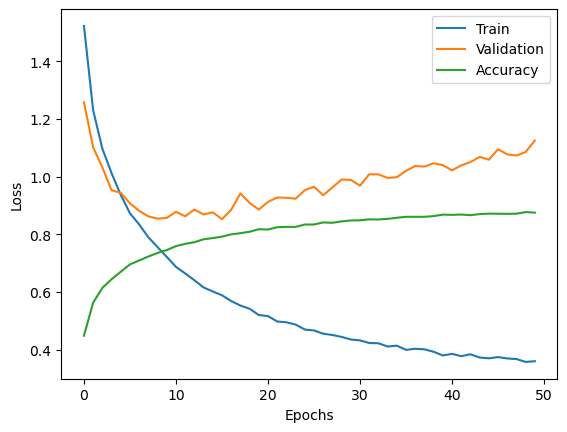

In [17]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(hist2)

## model-2 with more filters

In [158]:
# Model_2 with more filters
model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4)) 
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(units =10  , activation = 'softmax'))

model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model_2.summary()
# history_2 = model_2.fit(x_train, y_train_en, epochs = 100, verbose=1, validation_data=(x_test,y_test_en))

mdFit(model_2, 3, x_train, y_train_en, 30, my_callback)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         262272    
                                                      

Epoch 96/100
1563/1563 [==============================] - 188s 120ms/step - loss: 0.4444 - accuracy: 0.8520 - val_loss: 0.8314 - val_accuracy: 0.7559
Epoch 97/100
1563/1563 [==============================] - 189s 121ms/step - loss: 0.4351 - accuracy: 0.8572 - val_loss: 0.8047 - val_accuracy: 0.7521
Epoch 98/100
1563/1563 [==============================] - 187s 120ms/step - loss: 0.4350 - accuracy: 0.8578 - val_loss: 0.8134 - val_accuracy: 0.7609
Epoch 99/100
1563/1563 [==============================] - 186s 119ms/step - loss: 0.4459 - accuracy: 0.8533 - val_loss: 0.8311 - val_accuracy: 0.7556
Epoch 100/100
1563/1563 [==============================] - 185s 119ms/step - loss: 0.4340 - accuracy: 0.8576 - val_loss: 0.8637 - val_accuracy: 0.7518


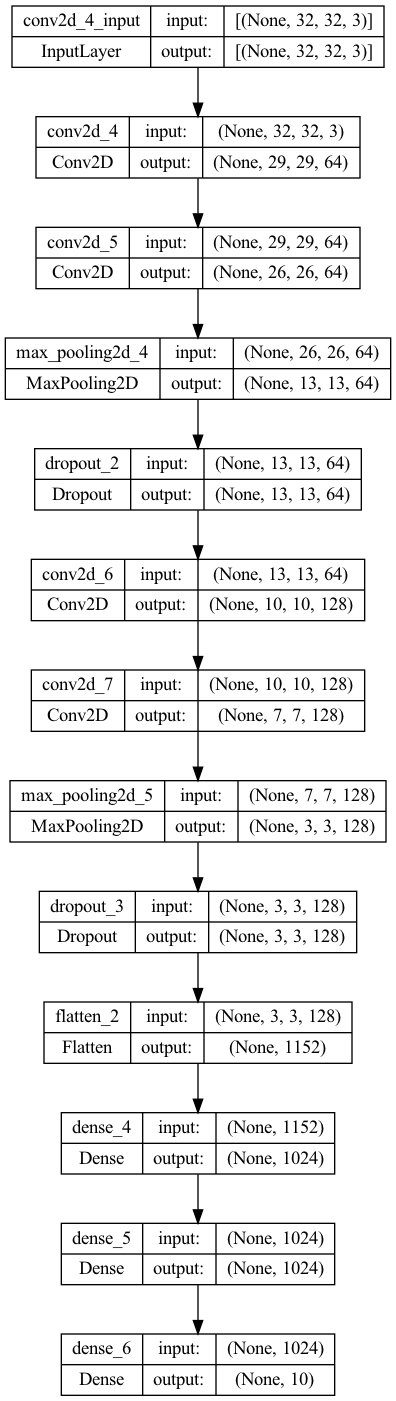

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
evaluation = model_2.evaluate(x_test, y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 [==============================] - 11s 34ms/step - loss: 0.8637 - accuracy: 0.7518
Test Accuracy of Model_2(with more  filters): 0.751800000667572


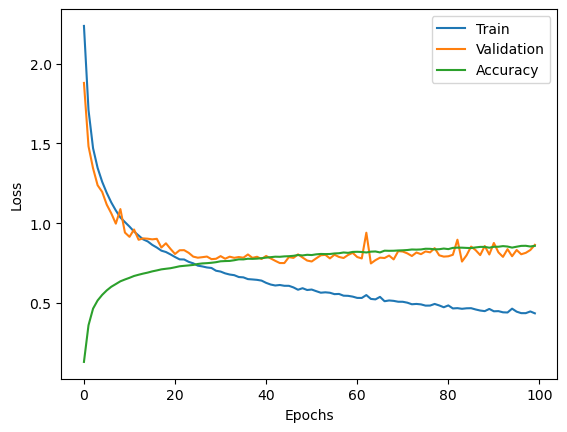

In [30]:
def plotloss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(hist3)

## Model-3 with Batch Normalization

In [31]:
# Model_3 with Batch Normalization
model_3 = Sequential()
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.summary()
# history_3 = model_3.fit(x_train, y_train_en, epochs = 100, verbose = 1, validation_data = (x_test, y_test_en))

mdFit(model_3, 4, x_train, y_train_en, 30, my_callback)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model_3.evaluate(x_test, y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

In [ ]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(hist4)

### 여기까지

In [210]:
class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, ,x_test, y_test, epochs, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['acc']) #acc, accuracy
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=epochs, verbose=1,
        callbacks=[my_callback ,save_best_model], validation_data=(x_test, y_test)) # validation_split=0.2
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

# + autoencoder

In [135]:
# Model_autoencoder, Create new data of ReShape

(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = x_train_f.astype('float32') / 255.
x_test_f = x_test_f.astype('float32') / 255.



print(x_train_f.shape)
print(x_test_f.shape)
print()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)

(50000, 32, 32, 3)
(50000, 1)


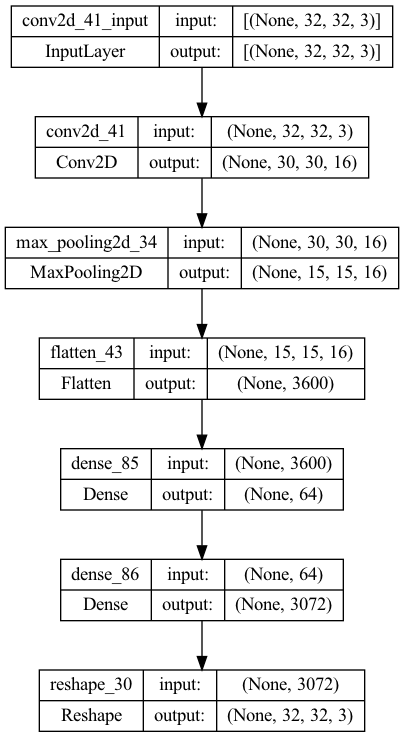

In [156]:
def autoencoder(x_train, color):
    if color == True :
        model = Sequential()

        # Encoder Part
        model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = [x_train.shape[1],x_train.shape[1],3]))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))

        # Decoder Part
        model.add(Dense(x_train.shape[1]*x_train.shape[1]*3, activation='sigmoid'))
        model.add(Reshape((x_train.shape[1], x_train.shape[1], 3)))
        
    else :
        model = Sequential()
        
        model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = [x_train.shape[1],x_train.shape[1],1]))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))

        model.add(Dense(x_train.shape[1]*x_train.shape[1], activation='sigmoid'))
        model.add(Reshape((x_train.shape[1], x_train.shape[1])))

    # Complie
    model.compile(optimizer='adam', loss=losses.MeanSquaredError())

    return model


model_acd = autoencoder(x_train, True)

plot_model(model_acd, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [140]:
x_train.shape

(50000, 32, 32, 3)

In [147]:
# model_acd.fit(x_train_f, x_train_f, epochs=10, shuffle=True, validation_data=(x_test_f, x_test_f))
model_acd.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))



# model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.0200 - val_loss: 0.0138
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0124 - val_loss: 0.0124
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0124 - val_loss: 0.0123
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [149]:
model_acd(x_test).shape

TensorShape([10000, 32, 32, 3])

In [189]:
encoded_imgs = model_acd(x_test).numpy()
decoded_imgs = model_acd(encoded_imgs).numpy()

pred = model_acd.predict(x_train)

1563/1563 [==============================] - 9s 6ms/step


In [190]:
pred.shape

(50000, 32, 32, 3)

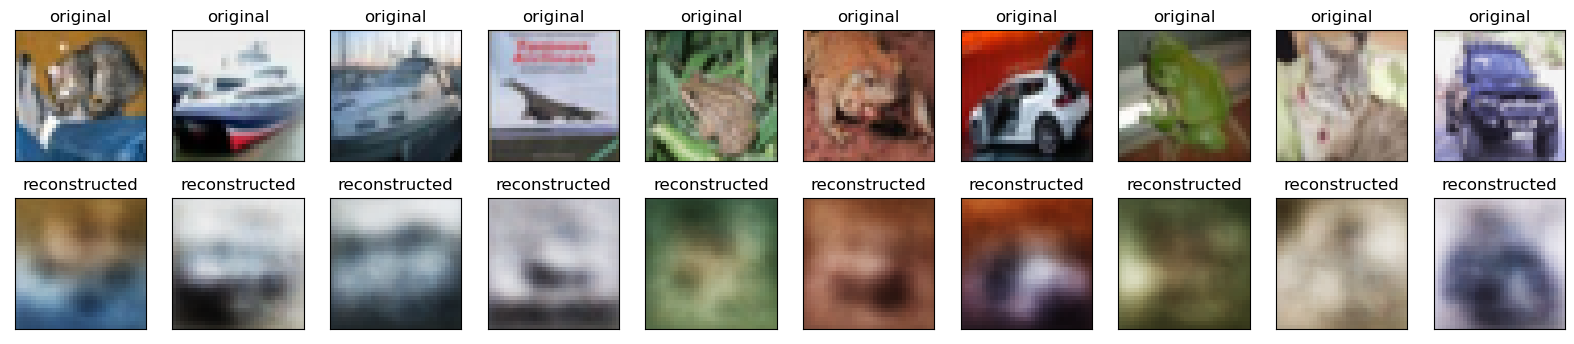

In [152]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 데이터 융합

In [201]:
x_train2 = np.concatenate((x_train, pred), axis=0)
x_train2.shape

(100000, 32, 32, 3)

In [200]:
y_train2 = np.concatenate((y_train, y_train), axis=0)
y_train2.shape

(100000, 1)

In [205]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

## 

In [206]:
def deepConv2D(x, fts, kns, std, name, num) :
#     st = 1
#     if std == 2 : st == 2
#     else : st == 1
        
    y = Conv2D(filters=fts, kernel_size=kns, strides=std, padding='same', activation='relu', 
              kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    y = BatchNormalization()(y)
    
    for i in range(num-1) :
        y = Conv2D(filters=fts, kernel_size=kns, strides=1, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(y)
        y = BatchNormalization()(y)
    
    if std == 2 :
        x = Conv2D(filters=fts, kernel_size=1, strides=2, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
        x = BatchNormalization()(x)

      
    output = x + y
    return output    

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


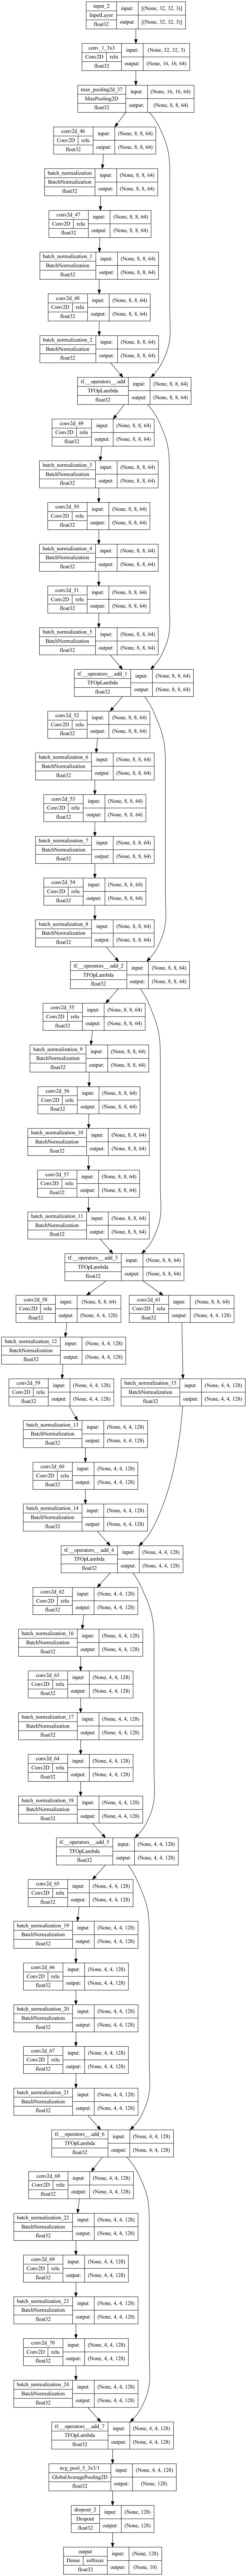

In [207]:
input_layer = Input(x_train2.shape[1:])

x = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu', name='conv_1_3x3', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((2, 2))(x)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/1", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/2", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/3", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/4", 3)
# x = MaxPool2D((2, 2))(x)
# x = DepthwiseConv2D((2,2), strides=1, padding="same")(x)

x = deepConv2D(x, 128, (3,3), 2, "Conv2D/128/3x3/1", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/2", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/3", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/4", 3)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
# x = Flatten()(x)
x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

model_res = Model(input_layer, x, name='mini_res_net')

plot_model(model_res, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [211]:
mdFit(model_res, 20, x_train2, y_train2, 30, my_callback)

Model: "JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_37 (MaxPooling2D  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
 )                                                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 8, 8, 64)     36928       ['max_pooling2d_37[0][0]']     

                                                                                                  
 batch_normalization_12 (BatchN  (None, 4, 4, 128)   512         ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_59 (Conv2D)             (None, 4, 4, 128)    147584      ['batch_normalization_12[0][0]'] 
                                                                                                  
 batch_normalization_13 (BatchN  (None, 4, 4, 128)   512         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_61 (Conv2D)             (None, 4, 4, 128)    8320        ['tf.__operators__.add_3[0][0]'] 
          

Total params: 2,161,546
Trainable params: 2,156,682
Non-trainable params: 4,864
__________________________________________________________________________________________________
Epoch 1/30
486/625 [======================>.......] - ETA: 34s - loss: 1.8540 - acc: 0.3127

KeyboardInterrupt: 

In [212]:
!pip install LabelImg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 6.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 33.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 21.1 MB/s eta 0:00:0000:0100:01
  Created wheel for LabelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261524 sha256=5fd13f7c1764a1f75615f6d66a32418f5da169408fc486b0daff508c739db25d
  Stored in directory: /Users/werther/Library/Caches/pip/wheels/df/39/12/bf80c441ad46616d5b271867a6ece21e8a083af10903b8e53a
Successfully built LabelImg
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 requires pyqtwebengine<5.16, which is not installed.


In [219]:
# yolo : 빠르게
# RCNN : 정확하게

from xml.etree.ElementTree import parse

xml_file = './image/AirPodsProCase.xml'

tree = parse(xml_file)
root = tree.getroot()

for object in root.iter('object') :
    xmin = int(object.find('bndbox').findtext('xmin'))
    ymin = int(object.find('bndbox').findtext('ymin'))
    xmax = int(object.find('bndbox').findtext('xmax'))    
    ymax = int(object.find('bndbox').findtext('ymax'))        
    print(xmin, ymin, xmax, ymax)

161 89 777 548


In [216]:
sample = pd.read_xml('./image/AirPodsProCase.xml')

In [217]:
sample

,folder,filename,path,database,width,height,depth,segmented,name,pose,truncated,difficult,bndbox
0,image,None,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
1,None,AirPodsProCase.png,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2,None,None,/Users/werther/image/AirPodsProCase.png,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
3,None,None,None,Unknown,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN
4,None,None,None,None,926.0,694.0,3.0,NaN,None,None,NaN,NaN,NaN
5,None,None,None,None,NaN,NaN,NaN,0.0,None,None,NaN,NaN,NaN
6,None,None,None,None,NaN,NaN,NaN,NaN,airpodspro,Unspecified,0.0,0.0,NaN


In [2]:
!python --version

Python 3.9.13
